In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats, integrate
import seaborn as sns

In [14]:
##### CAP LOG2FOLD

# df = 38055 rows
df = pd.read_csv("CAP_salmon_norm.csv")
df['gene_id'] = df['gene_id'].str.split('.').str[0]

en = pd.read_csv("mart_export.txt", sep="\t")
en = en.rename(columns = {'Gene stable ID':'gene_id'})
df_new = pd.merge(df, en, on='gene_id')

# 37929 rows
cols = list(df_new)
cols = cols[:1] +cols[-2:] + cols[1:-2]
df_new = df_new[cols]
df_new.drop_duplicates()
#df_new.to_csv("CAP_salmon_norm_gene.csv", index=False)
df_new['H/C'] = (df_new['H_1104_CAP_mRNASeq']+ df_new['H_1105_CAP_mRNASeq'])/(df_new['C_0113_CAP_mRNASeq']+ df_new['C_0114_CAP_mRNASeq'])
df_new['Log2FC'] = np.log2(df_new['H/C'])
cols = list(df_new)
cols = cols[:3] + cols[-2:] + cols[3:-2]
df_new = df_new[cols]
#df_new1 = df_new1.sort_values(['Log2FC'], ascending=[False])

# genes are doubled or halved, 3996 rows
df_new2 = df_new[(df_new.Log2FC > 1) | (df_new.Log2FC < -1)]
df_new2 = df_new2.sort_values(['Log2FC'], ascending=[True])
df_new2

#df_new2.to_csv("CAP_log2FC.csv", index=False)
#df_new2['HGNC symbol'].to_csv("CAP_log2FC_genes.csv", index=False)

,gene_id,Gene name,HGNC symbol,H/C,Log2FC,C_0113_CAP_mRNASeq,H_1104_CAP_mRNASeq,C_0114_CAP_mRNASeq,H_1105_CAP_mRNASeq
6666,ENSG00000179813,FAM216B,FAM216B,0.033510,-4.899263,599.144730,14.054126,15.041462,6.527279
28881,ENSG00000146809,ASB15,ASB15,0.057087,-4.130696,6.229789,13.438834,772.913701,31.040080
16472,ENSG00000179023,KLHDC7A,KLHDC7A,0.065058,-3.942121,6.229789,6.203469,286.547764,12.844171
10688,ENSG00000211899,IGHM,IGHM,0.071079,-3.814437,1.038298,7.236295,386.881995,20.336604
3558,ENSG00000279296,PRAL,PRAL,0.095151,-3.393636,1430.619043,148.264450,820.860709,65.966270
31824,ENSG00000235281,RP11-526P5.2,NaN,0.095503,-3.388309,16.612770,1.033756,106.286262,10.703476
11609,ENSG00000131401,NAPSB,NAPSB,0.097786,-3.354223,31.148943,9.303808,197.620173,13.066696
13777,ENSG00000197057,DTHD1,DTHD1,0.109421,-3.192040,508.766071,29.978937,58.669932,32.110427
23492,ENSG00000269138,ZNF209P,ZNF209P,0.121170,-3.044898,64.509669,4.135026,31.460734,7.493685
797,ENSG00000278558,TMEM191B,TMEM191B,0.126079,-2.987601,74.458330,3.429942,65.165213,14.173650


In [15]:
##### CAP COUNTS BETA
import pandas as pd
# df = 38055 rows
df = pd.read_csv("CAP_salmon_firth.csv")
#df.to_csv("CAP_salmon_firth.csv", index=False)
df = df.rename(columns = {'Unnamed: 0':'Genes'})
df['Genes'] = df['Genes'].str.split('.').str[0]

en = pd.read_csv("mart_export.txt", sep="\t")
en = en.rename(columns = {'Gene stable ID':'Genes'})
df_new = pd.merge(df, en, on='Genes')

# 37929 rows
columnsTitles = ['Genes', 'Gene name','HGNC symbol','counts__beta','counts__p','counts__padj','int__beta', 'int__p','int__padj','Subject.death__beta','Subject.death__padj']
df_new = df_new.reindex(columns=columnsTitles)

# order by counts beta
df2 = df_new.sort_values(['counts__beta'], ascending=[False])
#df_beta = df2[df2['counts__padj'] < 0.05]

# order by FDR values
df3 = df_new.sort_values(['counts__p'], ascending=[True])

# NO SIGNIFICANT VALUES FOUND
df_fdr = df3[df3['counts__padj'] < 0.05]
#### df_fdr is EMPTY 

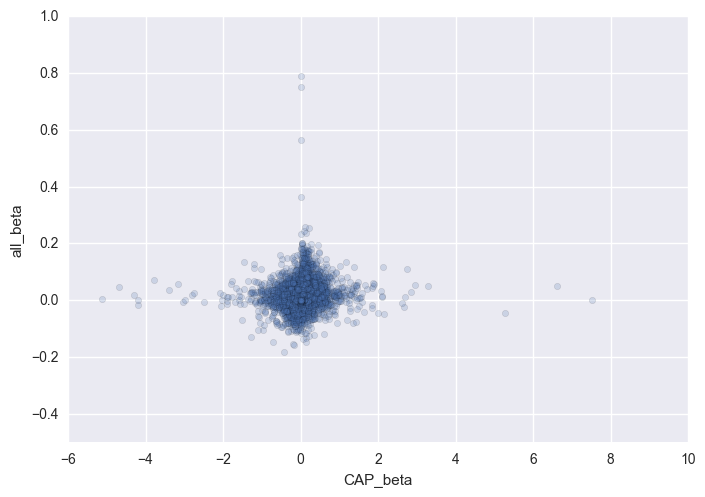

In [16]:
##### CAP COUNTS BETA
#Compare the DE gene list from CAP samples to those from all samples (produce a scatter plot of beta 
#estimates for each gene)

# Drops other columns except counts_beta and gene name
# 37929 rows
CAP_beta = df_new.drop(df_new.columns[[2,4,5,6,7,8,9,10]], axis=1)
CAP_beta = CAP_beta.rename(columns = {'counts__beta':'CAP_beta'})

# 27881 rows
df_all = pd.read_csv("all_salmon_firth.csv")
df_all = df_all.rename(columns = {'Unnamed: 0':'Genes'})
df_all['Genes'] = df_all['Genes'].str.split('.').str[0]
#df_all2 = df_all.sort_values(['counts__beta'], ascending=[False])
all_beta = df_all[['Genes','counts__beta']]
all_beta = all_beta.rename(columns = {'counts__beta':'all_beta'})

# 27193 rows
merge_beta = pd.merge(CAP_beta, all_beta, on='Genes', how='inner')
merge_beta = merge_beta.drop_duplicates()
#merge_beta = merge_beta.drop_duplicates(subset=['Gene name', 'CAP_beta', 'all_beta'])
merge_beta.plot(kind='scatter', x='CAP_beta', y='all_beta', alpha = 0.2)
plt.axis([-6,10,-0.5,1])
#plt.scatter(merge_beta.CAP_beta, merge_beta.all_beta, alpha=0.2)
plt.show()
#merge_beta.to_csv("merged_beta.csv", index=False)
#merge_beta

In [17]:
def dist(s):
    v0 = [0,0]
    v1 = [0,0]
    v2 = [0,0]
    v3 = [0,0]
    v4 = [0,0]
    v5 = [0,0]
    v6 = [0,0]
    v7 = [0,0]
    v8 = [0,0]
    v9 = [0,0]
    v10 = [0,0]
    v11 = [0,0]
    v12 = [0,0]
    v13 = [0,0]
    v14 = [0,0]
    v15 = [0,0]
    v16 = [0,0]
    v17 = [0,0]
    v18 = [0,0]
    v19 = [0,0]
    v20 = [0,0]
    for i in range(len(s)):
        for j in range(len(s[0])):
            var = s[i][j]
            if var < 0.0000000001:
                v0[j] += 1
            if var > 0.0000000001 and var < 0.000000001:
                v1[j] += 1
            if var > 0.000000001 and var < 0.00000001:
                v2[j] += 1
            if var > 0.00000001 and var < 0.0000001:
                v3[j] += 1
            if var > 0.0000001 and var < 0.000001:
                v4[j] += 1
            if var > 0.000001 and var < 0.00001:
                v5[j] += 1
            if var > 0.00001 and var < 0.0001:
                v6[j] += 1
            if var > 0.0001 and var < 0.001:
                v7[j] += 1
            if var > 0.001 and var < 0.01:
                v8[j] += 1
            if var > 0.01 and var < 0.1:
                v9[j] += 1
            if var > 0.1 and var < 1:
                v10[j] += 1
            if var > 1 and var < 10:
                v11[j] += 1
            if var > 10 and var < 100:
                v12[j] += 1
            if var > 100 and var < 1000:
                v13[j] += 1
            if var > 1000 and var < 10000:
                v14[j] += 1
            if var > 10000 and var < 100000:
                v15[j] += 1
            if var > 100000 and var < 1000000:
                v16[j] += 1
            if var > 1000000 and var < 10000000:
                v17[j] += 1
            if var > 10000000 and var < 100000000:
                v18[j] += 1
            if var > 100000000 and var < 1000000000:
                v19[j] += 1
            if var > 1000000000 and var < 10000000000:
                v20[j+1] += 1
    return (v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20)

H_1104    1.812881e-09
H_1105    1.151950e-03
dtype: float64
H_1104    8.870148e+07
H_1105    3.290511e+04
dtype: float64


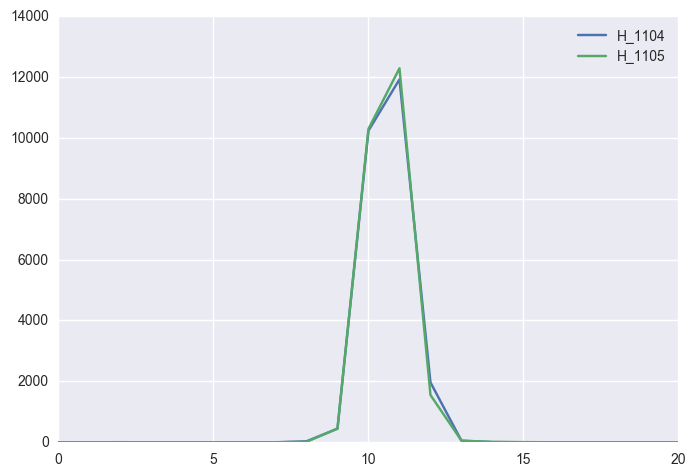

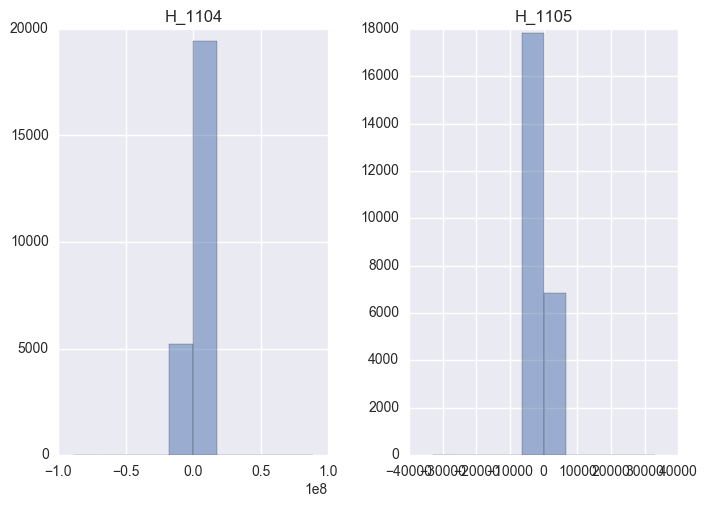

/Users/Mojito/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


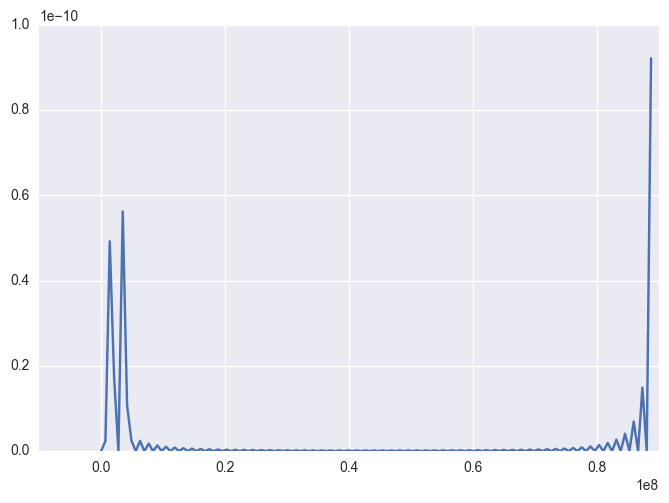

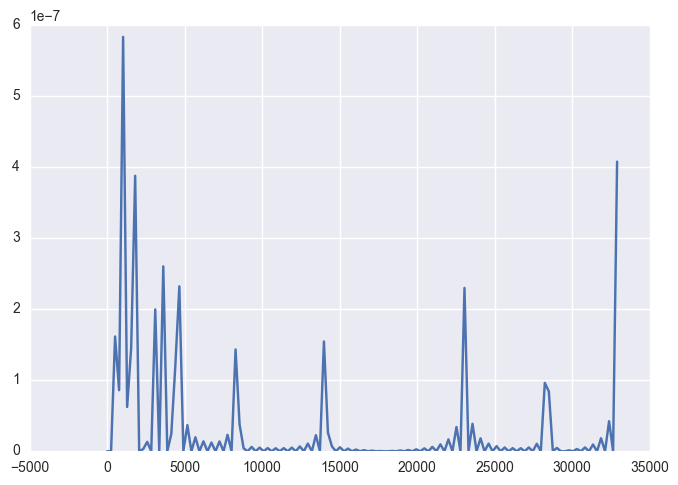

In [18]:
###### CAP RATIOS

df1 = pd.read_csv("all_salmon_norm.csv")
en = pd.read_csv("mart_export.txt", sep="\t")
en = en.rename(columns = {'Gene stable ID':'gene_id'})
df1.drop_duplicates()
#df['gene_id'] = df['gene_id'].str.split('.').str[0]
#df_new = pd.merge(df1, en, on='gene_id')
df = pd.DataFrame(df1['gene_id'])

H_1105 = pd.DataFrame(df1['H_1105_CAP_mRNASeq']/df1['H_1105_BA9_mRNASeq'])
H_1105 = H_1105.rename(columns = {0:'H_1105'})
H_1105 = H_1105.replace([np.inf, -np.inf], np.nan)
#H_1105_2FC = H_1105['H_1105_2FC'] = np.log2(H_1105['H_1105'])

H_1104 = pd.DataFrame(df1['H_1104_CAP_mRNASeq']/df1['H_1104_BA9_mRNASeq'])
H_1104 = H_1104.rename(columns = {0:'H_1104'})
H_1104 = H_1104.replace([np.inf, -np.inf], np.nan)
#H_1106 also presymptomatic

df2 = pd.concat([df, H_1105, H_1104], axis=1)
df2 = pd.DataFrame(df2, index=df2.index, columns=['H_1104','H_1105'])
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2 = df2[(df2 != 0).all(1)]
df2 = df2.dropna()
print(df2.min())
print(df2.max())
#df2.to_csv("CAP_ratio.csv", index=False)
#df2.plot.kde();
#plt.figure();
#plt.show()
#df3 = df2.drop(df.index[0:9940])

var = df2.values.tolist()
#H_1105.plot()
#plt.axis([-120,120,0,0.010])
#plt.axis([-10000000,10000000,0,0.0000002])
#H_1104.plot.kde()
#plt.show()
#H_1104.plot.kde()
#df3

v = pd.DataFrame(list(dist(var)))
v.columns = ['H_1104', 'H_1105']
v.plot()
plt.show()

df2.diff().hist(alpha=0.5)
plt.show()

n = df2['H_1104'].as_matrix()
m = df2['H_1105'].as_matrix()
sns.distplot(n, hist=False)
plt.show()
sns.distplot(m, hist=False)
plt.show()


Total Var    10.143719
Ctrl Var      7.017499
HD Var       11.552236
dtype: float64
Total Var    8.557487e+11
Ctrl Var     7.260288e+11
HD Var       1.089649e+12
dtype: float64


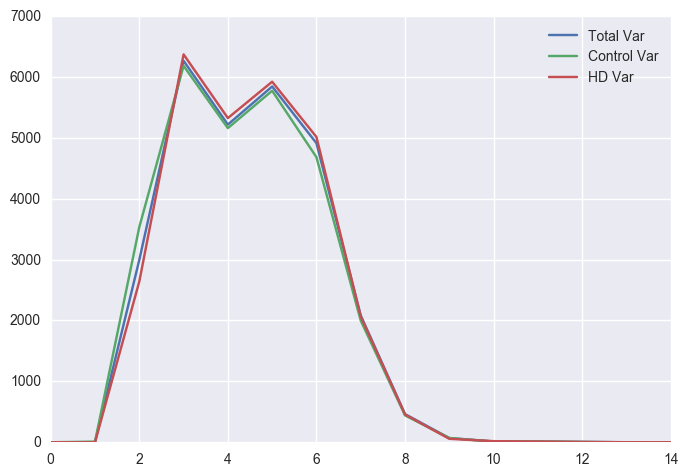

,Total Var,Ctrl Var,HD Var
0,3.047176e+06,1.795061e+06,5.176663e+06
1,3.029268e+10,2.716971e+10,3.645039e+10
2,4.233878e+05,1.580643e+05,8.944866e+05
3,2.072529e+09,8.249747e+08,4.170906e+09
4,1.088994e+10,5.339405e+09,2.075361e+10
5,1.654930e+03,1.857011e+03,1.318030e+03
6,1.184614e+09,6.922912e+08,2.085153e+09
7,1.599581e+03,1.507225e+03,1.772528e+03
8,4.945904e+10,3.980561e+10,6.701759e+10
9,5.728685e+11,4.085817e+11,8.773088e+11


In [21]:
###### CAP GENE VARIANCE

sample_info = pd.read_csv('HD_mRNASeq_sample_info.csv', sep=',', comment='#')

dataset_ids = sample_info['Dataset.dataset_id'].tolist()
control_ids = [ _ for _ in dataset_ids if _.startswith('C')]
HD_ids = [ _ for _ in dataset_ids if _.startswith('H')]

# Calculate variance of all samples, all control samples, all HD samples
df_var = pd.read_csv("all_salmon_norm.csv")
df_var['Total Var'] = df_var.var(axis=1)
df_var['Ctrl Var'] = df_var[control_ids].var(axis=1)
df_var['HD Var'] = df_var[HD_ids].var(axis=1)

# Pull variance columns out
cols = list(df_var)
cols = cols[-3:]
df_var2 = df_var[cols]

var_list = df_var2.values.tolist()
tot_var = df_var2['Total Var'].values.tolist()
ct_var = df_var2['Ctrl Var'].values.tolist()
hd_var = df_var2['HD Var'].values.tolist()

# Max and min of all each column
#print(df_var2['Total Var'].min())
#print(df_var2['Total Var'].max())
#print(df_var2['Ctrl Var'].min())
#print(df_var2['Ctrl Var'].max())
#print(df_var2['HD Var'].min())
#print(df_var2['HD Var'].max())
print(df_var2.min())
print(df_var2.max())

def dist_var2(s):
    v0 = [0,0,0]
    v1 = [0,0,0]
    v2 = [0,0,0]
    v3 = [0,0,0]
    v4 = [0,0,0]
    v5 = [0,0,0]
    v6 = [0,0,0]
    v7 = [0,0,0]
    v8 = [0,0,0]
    v9 = [0,0,0]
    v10 = [0,0,0]
    v11 = [0,0,0]
    v12 = [0,0,0]
    v13 = [0,0,0]
    v14 = [0,0,0]
    for i in range(len(s)):
        for j in range(len(s[0])):
            var = len(str(int(s[i][j])))
            if var == 0:
                v0[j] += 1
            if var == 1:
                v1[j] += 1
            if var == 2:
                v2[j] += 1
            if var == 3:
                v3[j] += 1
            if var == 4:
                v4[j] += 1
            if var == 5:
                v5[j] += 1
            if var == 6:
                v6[j] += 1
            if var == 7:
                v7[j] += 1
            if var == 8:
                v8[j] += 1
            if var == 9:
                v9[j] += 1
            if var == 10:
                v10[j] += 1
            if var == 11:
                v11[j] += 1
            if var == 12:
                v12[j] += 1
            if var == 13:
                v13[j] += 1
            if var == 14:
                v14[j] += 1
    return (v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14)

d = pd.DataFrame(list(dist_var2(var_list)))
d.columns = ['Total Var', 'Control Var', 'HD Var']
d.plot()

plt.show()

df_var2